In [44]:
import os
import pandas as pd
import warnings
import matplotlib.pyplot as plt

import numpy as np
import seaborn as sns

from tqdm import tqdm
from random import randint
from tqdm import tqdm
import time
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier

import sys
#sys.path.append()
from KGB import preprocess_df, proceed_KGB


plt.rcParams["figure.figsize"] = (9, 6)
warnings.simplefilter("ignore")

# Load Data

In [45]:
current_dataset = 5
major_components = True
name_directory = "CTU-13-Dataset"
path = os.path.join(name_directory,str(current_dataset))
os.listdir(path)

['botnet-capture-20110815-fast-flux.pcap',
 'capture20110815-2.binetflow',
 'e4f816462c4fc84bb250e2b1d295bf23_85f9a5247afbe51e64794193f1dd72eb_unpacked.exe',
 'README']

In [46]:
datafile_name = [i for i in os.listdir(path) if i.endswith(".binetflow") ][0]
df = pd.read_csv(os.path.join(path,datafile_name))
df = preprocess_df(df)
df

,StartTime,Dur,Proto,SrcAddr,Sport,Dir,DstAddr,Dport,State,sTos,dTos,TotPkts,TotBytes,SrcBytes,Label,Backgroung_label,Normal_label,Botnet_label
35,2011-08-15 16:43:20.931208,1783.916870,tcp,147.32.84.59,64131,<?>,164.8.32.159,54992,PA_PA,0.0,0.0,293,32160,20485,flow=Background-Established-cmpgw-CVUT,True,False,False
36,2011-08-15 16:43:20.933428,0.444453,tcp,147.32.87.252,49218,<?>,147.32.80.13,3128,FPA_FPA,0.0,0.0,879,747909,19566,flow=To-Background-CVUT-Proxy,True,False,False
37,2011-08-15 16:43:20.933441,1804.837158,tcp,41.143.58.184,1328,<?>,147.32.86.179,58675,PA_PA,0.0,0.0,9547,942226,580940,flow=Background,True,False,False
38,2011-08-15 16:43:20.933541,0.187604,tcp,147.32.86.155,51273,<?>,204.154.94.81,80,FA_FA,0.0,0.0,3,198,132,flow=Background,True,False,False
39,2011-08-15 16:43:20.933942,1804.610718,tcp,147.32.86.179,58675,<?>,151.42.234.124,50001,PA_PA,0.0,0.0,29890,3689108,917036,flow=Background,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129827,2011-08-15 17:13:26.665269,0.020175,tcp,147.32.84.59,1121,->,147.32.80.13,80,SPA_SPA,0.0,0.0,5,1070,726,flow=To-Background-CVUT-Proxy,True,False,False
129828,2011-08-15 17:13:26.715751,0.000306,udp,147.32.86.20,63044,<->,147.32.80.9,53,CON,0.0,0.0,2,261,84,flow=To-Background-UDP-CVUT-DNS-Server,True,False,False
129829,2011-08-15 17:13:26.716285,0.076739,tcp,147.32.86.20,1311,->,188.138.84.239,80,SPA_SA,0.0,0.0,10,3639,429,flow=Background-TCP-Established,True,False,False
129830,2011-08-15 17:13:26.721279,0.000244,tcp,78.94.167.118,65017,->,147.32.84.118,6881,S_RA,0.0,0.0,2,134,74,flow=Background-TCP-Attempt,True,False,False


# Let's compute some anomaly scores

In [47]:
list_botnets = list(df[df.Label.str.contains("Botnet")].SrcAddr.unique())

In [48]:
proceed_KGB(df,anomaly_threshold =  2000, major_components = major_components ) 

147.32.84.118    3300.835505
147.32.84.138    4554.477266
147.32.84.165    2121.196811
147.32.84.59     6617.456062
147.32.85.25     2619.411449
147.32.85.7      3523.009677
147.32.85.76     2336.476633
147.32.86.20     3043.981635
dtype: float64

In [49]:
df[df.SrcAddr.isin(list_botnets)] # c'est l'attaquant

,StartTime,Dur,Proto,SrcAddr,Sport,Dir,DstAddr,Dport,State,sTos,dTos,TotPkts,TotBytes,SrcBytes,Label,Backgroung_label,Normal_label,Botnet_label
45650,2011-08-15 16:52:50.947767,0.000130,udp,147.32.84.165,1025,<->,147.32.80.9,53,CON,0.0,0.0,2,203,64,flow=From-Botnet-V46-UDP-DNS,False,False,True
45754,2011-08-15 16:52:53.201828,0.000452,udp,147.32.84.165,1025,<->,147.32.80.9,53,CON,0.0,0.0,2,590,87,flow=From-Botnet-V46-UDP-DNS,False,False,True
45755,2011-08-15 16:52:53.203182,0.037394,tcp,147.32.84.165,1027,->,74.125.232.195,80,SRPA_SPA,0.0,0.0,7,882,629,flow=From-Botnet-V46-TCP-HTTP-Google-Net-Estab...,False,False,True
48883,2011-08-15 16:53:42.316319,0.054648,udp,147.32.84.165,1025,<->,147.32.80.9,53,CON,0.0,0.0,2,226,71,flow=From-Botnet-V46-UDP-DNS,False,False,True
48892,2011-08-15 16:53:42.371928,1139.728638,tcp,147.32.84.165,1038,->,94.63.149.150,80,SPA_SPA,0.0,0.0,48,3584,1169,flow=From-Botnet-V46-TCP-WEB-Established,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127960,2011-08-15 17:12:52.581592,1.008225,tcp,147.32.84.165,2240,->,46.4.36.120,443,S_RA,0.0,0.0,6,366,186,flow=From-Botnet-V46-TCP-Attempt,False,False,True
128021,2011-08-15 17:12:53.673162,0.022795,tcp,147.32.84.165,2242,->,212.117.171.138,65500,SA_SA,0.0,0.0,3,184,122,flow=From-Botnet-V46-TCP-Not-Encrypted-SMTP-Pr...,False,False,True
128029,2011-08-15 17:12:53.817294,0.184262,udp,147.32.84.165,1025,<->,147.32.80.9,53,CON,0.0,0.0,2,294,72,flow=From-Botnet-V46-UDP-DNS,False,False,True
128037,2011-08-15 17:12:54.002371,31.425388,tcp,147.32.84.165,2243,->,64.12.175.136,587,SPA_FSPA,0.0,0.0,14,2752,195,flow=From-Botnet-V46-TCP-Established-SPAM,False,False,True


In [50]:
#"147.32.84.165"
end = pd.to_datetime("2011-08-16 12:10:15.643807")
cutted = df[df.StartTime<= end]
proceed_KGB(cutted,  anomaly_threshold = 1500, major_components = major_components ) 

147.32.84.118    3300.835505
147.32.84.138    4554.477266
147.32.84.165    2121.196811
147.32.84.170    1823.343062
147.32.84.229    1681.297442
147.32.84.59     6617.456062
147.32.85.25     2619.411449
147.32.85.7      3523.009677
147.32.85.76     2336.476633
147.32.86.20     3043.981635
dtype: float64

# Find the best anomaly threshold

## Compute anomalies on the whole dataset

In [51]:
window_count = 5
window_size = 5

def compute_anomalies_scores_for_windows(df, window_count = 5, window_size = 5, step = 1) : 
    # run iteratively KGB over the whole dataset
    # step : the decay between each anomaly score measure (in minutes)


    window_delta = pd.Timedelta(window_count + window_size -1, "m") # duration of the whole windows for an iteration
    min_time = df.StartTime.iloc[0] # first timestamp of the df
    max_time = df.StartTime.iloc[-1] # last ...
    duration = max_time-min_time - window_delta
    number_of_iterations = int(duration.total_seconds() / (step*60))


    res = []
    for i in tqdm(range(number_of_iterations)) : # for each iteration
        time_of_end = min_time + window_delta + pd.Timedelta(step*i, "m")
        cutted = df[df.StartTime<= time_of_end ]
        res.append(proceed_KGB(cutted, window_count = window_count,
                               window_size = window_size, major_components = major_components ) )
        
    new_res = [pd.DataFrame( {"anomaly_score" : df, "id_time_frame" : id_df}) for id_df, df in enumerate(res)]
    result = pd.concat(new_res)
    
    return result    

    
result = compute_anomalies_scores_for_windows(df, window_count = window_count, window_size = window_size, step = 1)
result

100%|██████████████████████████████████████████████████████████████████████████████████| 21/21 [08:19<00:00, 23.77s/it]


,anomaly_score,id_time_frame
0.0.0.0,0.0,0
00:15:17:2c:e5:2d,0.0,0
1.161.139.171,0.0,0
1.169.155.97,0.0,0
1.36.69.113,0.0,0
...,...,...
99.92.33.11,0.0,20
99.95.0.168,0.0,20
99.98.141.185,0.0,20
99.98.189.15,0.0,20


**Label results**

In [52]:

def label_data(df, list_botnets) :
    labels = []
    for index, row in tqdm(df.iterrows()) :
        labels.append(index in list_botnets)
    df["IP_src"] = df.index
    df["label"] = labels
    
    return df.sort_values("anomaly_score", ascending=False, inplace = False)
    
labelled_res =  label_data(result, list_botnets)
labelled_res

186457it [00:05, 34867.64it/s]


,anomaly_score,id_time_frame,IP_src,label
147.32.84.59,3303.573841,5,147.32.84.59,False
147.32.84.59,3274.522631,4,147.32.84.59,False
147.32.84.59,3266.824017,6,147.32.84.59,False
147.32.84.59,3230.673277,7,147.32.84.59,False
147.32.84.59,3200.839754,0,147.32.84.59,False
...,...,...,...,...
24.9.49.13,0.000000,6,24.9.49.13,False
24.90.116.112,0.000000,6,24.90.116.112,False
24.91.105.223,0.000000,6,24.91.105.223,False
24.91.39.186,0.000000,6,24.91.39.186,False


In [53]:
whitelist = ["147.32.84.59", "147.32.84.138"]
labelled_res[~labelled_res.IP_src.isin(whitelist)]

,anomaly_score,id_time_frame,IP_src,label
147.32.84.118,2313.198404,5,147.32.84.118,False
147.32.84.118,2311.480903,6,147.32.84.118,False
147.32.84.118,2286.413957,7,147.32.84.118,False
147.32.84.118,2264.212317,4,147.32.84.118,False
147.32.84.118,2193.416804,8,147.32.84.118,False
...,...,...,...,...
24.9.49.13,0.000000,6,24.9.49.13,False
24.90.116.112,0.000000,6,24.90.116.112,False
24.91.105.223,0.000000,6,24.91.105.223,False
24.91.39.186,0.000000,6,24.91.39.186,False


In [54]:
labelled_res[labelled_res.label==1].anomaly_score.describe() 
# the distribution of anomaly score of the botnet

count      20.000000
mean     1093.805217
std       547.509738
min         1.563940
25%       905.339510
50%      1351.181583
75%      1430.321458
max      1596.379879
Name: anomaly_score, dtype: float64

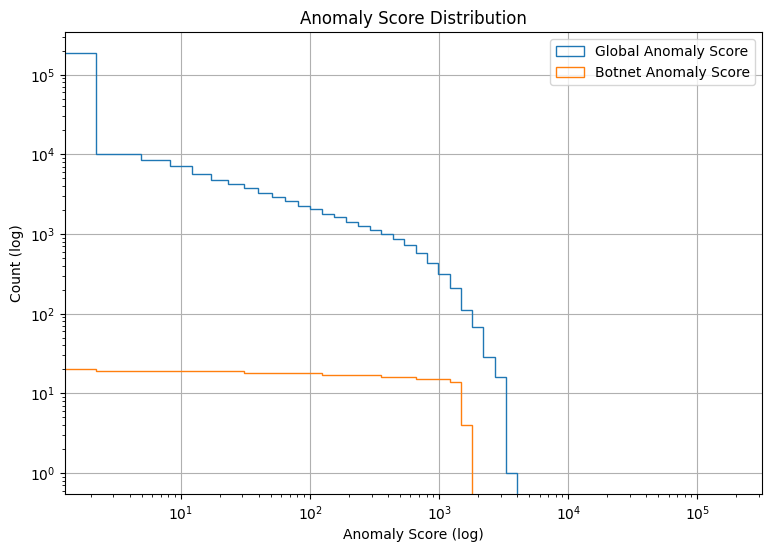

In [55]:
bins = 10*np.exp(np.arange(0,10,0.2))-10
f, ax = plt.subplots()
only_botnet = labelled_res[labelled_res.label==1]

labelled_res.hist(column = "anomaly_score",bins = bins, ax = ax,  histtype='step', cumulative=-1)
only_botnet.hist(column = "anomaly_score",bins = bins, ax = ax,  histtype='step', cumulative=-1)
ax.set_xscale('log')
ax.set_yscale('log')
plt.ylabel("Count (log)")
plt.xlabel("Anomaly Score (log)")
plt.title("Anomaly Score Distribution")
plt.ylim(bottom=0)
plt.legend(["Global Anomaly Score", "Botnet Anomaly Score"])

## Measure metrics

In [56]:
def compute_metrics(data,threshold, window_size = 5, consider_window_correc = False) :
    #don't know if we have to consider the entire df
    
    if consider_window_correc :
        alpha = 0.01
        correc_func = np.exp(-alpha * window_size)+1
    else :
        correc_func = 1
        
    
    tTP= []
    tTN = []
    tFP = []
    tFN = []
    
    for time_frame in data.id_time_frame.unique() :
        current_time_frame = data[data.id_time_frame==time_frame]
        ##counts_ip_src.set_index = current_time_frame.groupby("IP_src").agg({"label":"mean"})
        #print(current_time_frame.IP_src.value_counts())
        counts_ip_src = current_time_frame.set_index("IP_src") #already aggregated
        #print(counts_ip_src)
        count_unik_botnet = len(current_time_frame[current_time_frame.label==1])
        count_unik_not_botnet = len(current_time_frame[current_time_frame.label==0])
    
        c_TP = counts_ip_src[(counts_ip_src.label==1) & (counts_ip_src.anomaly_score>threshold)]
        c_TN = counts_ip_src[(counts_ip_src.label==0) & (counts_ip_src.anomaly_score<=threshold)]
        c_FP = counts_ip_src[(counts_ip_src.label==0) & (counts_ip_src.anomaly_score>threshold)]
        c_FN = counts_ip_src[(counts_ip_src.label==1) & (counts_ip_src.anomaly_score<=threshold)]
        """print(c_TP, 2*"\n")
        print(c_TN, 2*"\n")
        print(c_FP, 2*"\n")
        print(c_FN, 2*"\n")
        break"""
        if not consider_window_correc :
            count_unik_not_botnet, count_unik_botnet = 1, 1
        if count_unik_botnet>0 : 
            
            cur_tTP = len(c_TP)*correc_func/count_unik_botnet
            cur_tFN = len(c_FN)*correc_func/count_unik_botnet
            tTP.append(cur_tTP)
            tFN.append(cur_tFN)

              
        if count_unik_not_botnet > 0 :
            cur_tTN = len(c_TN)/count_unik_not_botnet
            cur_tFP = len(c_FP)/count_unik_not_botnet
            tTN.append(cur_tTN)
            tFP.append(cur_tFP)
         
    
    tTP = np.mean(tTP)
    tTN = np.mean(tTN)
    tFP = np.mean(tFP)
    tFN = np.mean(tFN)
    
    
    
    TPR = tTP/(tTP+tFN)
    TNR = tTN/(tTN+tFP)
    FPR = tFP/(tTN+tFP)
    FNR = tFN/(tTP+tFN)
    Prec = tTP/(tTP+tFP)
    Acc = (tTP+tTN)/(tTP+tTN+tFP+tFN)
    ErrR = (tFN+tFP)/(tTP+tTN+tFP+tFN)
    FM1 = 2*(Prec*TPR)/(Prec+TPR)
    metrics = {"tTP":tTP,"tTN": tTN,"tFP":tFP,"tFN":tFN,"TPR" : TPR, "TNR":TNR,"FPR":FPR,"FNR":FNR, "Prec":Prec,
              "Acc":Acc, "ErrR":ErrR, "FM1":FM1}
    return metrics
    

metrics = compute_metrics(labelled_res,10,window_size = window_size )  
    
metrics  

{'tTP': 0.9047619047619048,
 'tTN': 8578.714285714286,
 'tFP': 299.23809523809524,
 'tFN': 0.047619047619047616,
 'TPR': 0.9500000000000001,
 'TNR': 0.9662942441682713,
 'FPR': 0.033705755831728676,
 'FNR': 0.05,
 'Prec': 0.0030144375694113913,
 'Acc': 0.9662924963932703,
 'ErrR': 0.0337075036067297,
 'FM1': 0.006009805472086035}

**Let's try different thresholds**

100%|████████████████████████████████████████████████████████████████████████████████| 520/520 [00:44<00:00, 11.64it/s]


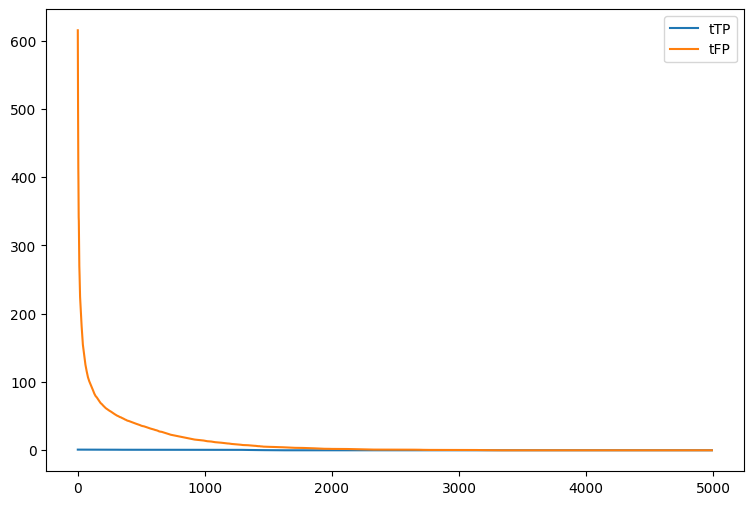

In [57]:
losses = []
list_metrics = []
thresholds = list(range(20)) +list(range(30,60,5)) +  list(range(60,5000,10))
for i in tqdm(thresholds):
    
    metrics = compute_metrics(labelled_res,i)   
    list_metrics.append(metrics)
    #losses.append(loss_perso(metrics) )

legend = ['tTP','tFP' ]
plt.plot(thresholds,[i[legend[0]] for i in list_metrics])
plt.plot(thresholds,[i[legend[1]] for i in list_metrics])
plt.legend(legend)

In [58]:

metrics_df = pd.DataFrame.from_records(list_metrics)
metrics_df.rename(columns = {"tTP":"TP", "tTN":"TN", "tFP":"FP", "tFN":"FN"}, inplace = True)
metrics_df["thresholds"] = thresholds
selected = metrics_df[metrics_df.FPR<0.011]
selected.sort_values(by = ["TP", "thresholds"], ascending = [False, True]).head(15)

,TP,TN,FP,FN,TPR,TNR,FPR,FNR,Prec,Acc,ErrR,FM1,thresholds
30,0.857143,8781.238095,96.714286,0.095238,0.90,0.989106,0.010894,0.10,0.008785,0.989097,0.010903,0.017400,100
31,0.857143,8785.476190,92.476190,0.095238,0.90,0.989584,0.010416,0.10,0.009184,0.989574,0.010426,0.018182,110
32,0.809524,8790.238095,87.714286,0.142857,0.85,0.990120,0.009880,0.15,0.009145,0.990105,0.009895,0.018095,120
33,0.809524,8795.000000,82.952381,0.142857,0.85,0.990656,0.009344,0.15,0.009665,0.990641,0.009359,0.019112,130
34,0.809524,8798.523810,79.428571,0.142857,0.85,0.991053,0.008947,0.15,0.010089,0.991038,0.008962,0.019941,140
35,0.809524,8800.666667,77.285714,0.142857,0.85,0.991295,0.008705,0.15,0.010366,0.991279,0.008721,0.020482,150
36,0.809524,8803.571429,74.380952,0.142857,0.85,0.991622,0.008378,0.15,0.010766,0.991607,0.008393,0.021263,160
37,0.809524,8806.238095,71.714286,0.142857,0.85,0.991922,0.008078,0.15,0.011162,0.991907,0.008093,0.022035,170
38,0.809524,8808.904762,69.047619,0.142857,0.85,0.992223,0.007777,0.15,0.011588,0.992207,0.007793,0.022865,180
39,0.809524,8810.523810,67.428571,0.142857,0.85,0.992405,0.007595,0.15,0.011863,0.992390,0.007610,0.023400,190


In [59]:
selected.sort_values(by = ["TP", "thresholds"], ascending = [False, True]).head(8)[["TPR","FPR", "thresholds"]]

,TPR,FPR,thresholds
30,0.90,0.010894,100
31,0.90,0.010416,110
32,0.85,0.009880,120
33,0.85,0.009344,130
34,0.85,0.008947,140
35,0.85,0.008705,150
36,0.85,0.008378,160
37,0.85,0.008078,170


**Mettre la limite à 120 semble intéressant**

# Test

In [60]:
current_dataset = 6
name_directory = "CTU-13-Dataset"
path = os.path.join(name_directory,str(current_dataset))
datafile_name = [i for i in os.listdir(path) if i.endswith(".binetflow") ][0]
df_test = pd.read_csv(os.path.join(path,datafile_name))
df_test = preprocess_df(df_test)
list_botnets_test = list(df_test[df_test.Label.str.contains("Botnet")].SrcAddr.unique())


In [61]:
result = compute_anomalies_scores_for_windows(df_test, window_count = window_count, window_size = window_size, step = 1)

100%|████████████████████████████████████████████████████████████████████████████████| 120/120 [34:25<00:00, 17.21s/it]


In [62]:
labelled_res_test =  label_data(result, list_botnets_test)

829993it [00:23, 34660.02it/s]


In [63]:
met_test = compute_metrics(labelled_res_test,120)  
met_test_2 = compute_metrics(labelled_res_test,200)  

**'tTP': 1.8536679532756786 , 'tFP': 0.012194027649070939**

In [64]:
metrics_df_test = pd.DataFrame.from_records([met_test,met_test_2])
metrics_df_test.rename(columns = {"tTP":"TP", "tTN":"TN", "tFP":"FP", "tFN":"FN"}, inplace = True)
metrics_df_test

,TP,TN,FP,FN,TPR,TNR,FPR,FNR,Prec,Acc,ErrR,FM1
0,0.991667,6843.866667,71.741667,0.008333,0.991667,0.989626,0.010374,0.008333,0.013634,0.989626,0.010374,0.026899
1,0.983333,6867.375000,48.233333,0.016667,0.983333,0.993025,0.006975,0.016667,0.019980,0.993024,0.006976,0.039164
